## Function visualization

### Theory
#### The Leff function is expressed by the following formula.

$$
\mathrm{Leff}(x) = \frac{Lself*Rsol*(Rsol+Rs-(2\pi x)^2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cselfk*Rsol*Rs)}{(Rsol+Rs-(2\pi x)^2*Lself*Cself*Rsol)^2+(2\pi x)^2*(Lself+Cself*Rsol*Rs)^2}
$$

 **Includes 2πx = ω ( x = f ), Lself, Rsol, Rs, Cself as function constants.**<br>
**Please refer to the result below for the outline of the function.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Leff(x):
    return (Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2)

In [3]:
Lself=2.08E-5
Rs=1.2
Rsol=1050
Cself=9.72E-11

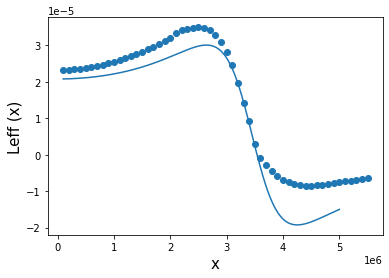

In [22]:
x_min = 100000
x_max = 5000000
N = 10000
x = np.linspace(x_min, x_max, N)
y = Leff(x)
plt.scatter(list_measured_value[0],list_measured_value[1])
plt.plot(x,y)
plt.xlabel('x',fontsize = 15)
plt.ylabel('Leff (x)',fontsize =15)
plt.show()

In [5]:
import pandas as pd

In [8]:
df_measured_value = pd.read_csv('../../Research_identification_ecg/moto_measured_value.csv',sep=',')
df_measured_value.head()

,周波数f[Hz],実測値L[H]
0,100000,0.000023
1,200000,0.000023
2,300000,0.000023
3,400000,0.000024
4,500000,0.000024


In [18]:
list_measured_value = df_measured_value.T.values.tolist()

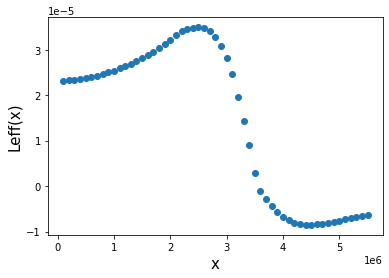

In [21]:
plt.scatter(list_measured_value[0],list_measured_value[1])
plt.xlabel('x',fontsize=15)
plt.ylabel('Leff(x)',fontsize=15)
plt.show()